In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [3]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.50.post1', '1.0.1.post2')

In [4]:
torch.cuda.set_device(0)

In [5]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-sanskrit/language-model')

In [6]:
p = path.glob('SanskritWikipediaArticles/*')
files = [x for x in p if x.is_file()]

In [7]:
len(files)

22273

In [8]:
train_files, test_files = train_test_split(files, test_size=0.3)

In [9]:
len(train_files), len(test_files)

(15591, 6682)

In [10]:
train_files[0]

PosixPath('/home/gaurav/PycharmProjects/nlp-for-sanskrit/language-model/SanskritWikipediaArticles/11892.pkl')

In [11]:
str(train_files[0]).split('/')[-1][:-4]

'11892'

In [12]:
# Preparing dataset for fastai
for file in train_files:
    with open(file, 'rb') as f:
        text = pickle.load(f)
    with open(path/'SanskritDataset'/'train'/(str(file).split('/')[-1][:-4]+'.txt'), "w") as text_file:
        text_file.write(text)

KeyboardInterrupt: 

In [ ]:
for file in test_files:
    with open(file, 'rb') as f:
        text = pickle.load(f)
    with open(path/'SanskritDataset'/'valid'/(str(file).split('/')[-1][:-4]+'.txt'), "w") as text_file:
        text_file.write(text)

In [21]:
from inltk.tokenizer import SanskritTokenizer

In [22]:
SanskritTokenizer

inltk.tokenizer.SanskritTokenizer

In [14]:
# class SanskritTokenizer(BaseTokenizer):
#     def __init__(self, lang:str):
#         self.lang = lang
#         self.sp = spm.SentencePieceProcessor()
#         self.sp.Load(str(path/"../tokenizer/sanskrit_lm.model"))
        
#     def tokenizer(self, t:str) -> List[str]:
#         return self.sp.EncodeAsPieces(t)

In [23]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/sanskrit_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(20000)]

In [69]:
itos

['<unk>',
 '<s>',
 '</s>',
 '▁।',
 '▁',
 'ं',
 ',',
 'ः',
 '-',
 'म्',
 'स्य',
 'े',
 '▁च',
 '▁अस्ति',
 '।',
 '.',
 '▁इति',
 'ा',
 '▁आसीत्',
 'ाः',
 '·',
 '▁अपि',
 '▁एव',
 '▁भवति',
 '▁न',
 '▁सन्ति',
 'ेन',
 'ि',
 '▁अस्य',
 'ो',
 'ी',
 'ानि',
 '▁सः',
 '▁तस्य',
 '्',
 "▁'",
 'ेषु',
 ':',
 '▁“',
 'ानां',
 '▁स्म',
 '▁अभवत्',
 '▁q',
 '▁स',
 'ाय',
 '▁�',
 '▁अत्र',
 'म',
 "'",
 '▁वर्षे',
 '▁सह',
 '▁अ',
 'X',
 '”',
 'ात्',
 '▁अतः',
 '▁अस्मिन्',
 'न',
 '▁तमे',
 '▁यत्',
 '▁तत्र',
 'ौ',
 'तः',
 'ैः',
 'क',
 '▁तदा',
 'र',
 '▁|',
 'ान्',
 '▁"',
 'श',
 '▁इदं',
 '▁तु',
 '▁सा',
 '▁जनाः',
 '▁वर्तते',
 '▁नाम',
 'या',
 '’',
 'न्',
 '▁भारतस्य',
 'ता',
 '्य',
 '"',
 '▁–',
 'त',
 '▁स्व',
 '▁तथा',
 '▁तेन',
 'ति',
 'ेण',
 '�',
 'स',
 '▁वा',
 'राज्यस्य',
 '▁आ',
 '▁ततः',
 'ल',
 'श्च',
 '▁भवन्ति',
 '▁इत्यस्य',
 '▁अयं',
 '▁यदा',
 'याः',
 '▁प्रति',
 '▁-',
 'स्',
 'त्',
 'त्वेन',
 'योः',
 '▁•',
 '▁ते',
 '▁आसन्',
 '▁‘',
 '▁यथा',
 'व',
 '▁किन्तु',
 '▁प्र',
 '▁परन्तु',
 'नगरं',
 '▁तस्मिन्',
 'य',
 '▁वि',
 '▁हि',
 '▁एत

In [16]:
# 20,000 is the vocab size that we chose in sentencepiece
sanskrit_vocab = Vocab(itos)

In [17]:
tokenizer = Tokenizer(tok_func=SanskritTokenizer, lang='sa')

In [18]:
tokenizer.special_cases

['xxunk', 'xxpad', 'xxbos', 'xxfld', 'xxmaj', 'xxup', 'xxrep', 'xxwrep']

In [19]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-sanskrit/language-model')

In [20]:
data_lm = TextLMDataBunch.from_folder(path=path/'SanskritDataset', tokenizer=tokenizer, vocab=sanskrit_vocab)

In [21]:
data_lm.batch_size

64

In [18]:
data_lm.save()

In [14]:
data_lm.show_batch()

idx,text
0,"▁1958 ▁तमे ▁वर्षे ▁अस्याः ▁संस्थायाः ▁संरचना ▁अभवत् ▁। ▁नासा ▁इत्येव ▁संक्षिप्त नाम्ना ▁अस्याः ▁ख्यातिः ▁। ▁नासा याः ▁मुख्यकार्यालय ः ▁वाशिङ् ग टन् , ▁डि . सि . ▁नगरे ▁अस्ति ▁। ▁1958 ▁ तमवर्षस्य ▁29 ▁तमे ▁दिनाङ्के ▁नै श नल् ▁ए ड् वै ज़ री ▁क मि टी ▁फ़ र् ▁ए रोनॉटिक ्स् ▁इति ▁अन्तरिक्ष संस्थायाः ▁अव लु प्त ि ं ▁कृत्वा ▁अमेरिका सर्वकारः ▁नै श नल् ▁ए रोनॉटिक ्स्"
1,"▁व्यास त्रय मेव ▁प्रसिद्धं ▁द्वैत दर्शन े ▁न्याय ामृत ं , तर्क ता ण्ड व ं ▁ चन्द्रिका ▁चेति । ▁श्री मध्व ः ▁कल्प वृक्ष श्च ▁जय ाया ▁काम धु क् ▁स्मृत ः । चिन्तामणि स्तु ▁व्यास ार्य ः ▁मुनि त्र त मु दाह ृत म् ॥ इति ▁वाक्य ेनैव ▁ज्ञायते ▁व्यास तीर्थ स्य ▁वैशिष्ट्यम् । द्वैत वाङ्मय े ▁मध्वाचार्य ः ▁कल्प वृक्ष श्चेत् ▁जय तीर्थ मुनिः ▁काम धेनु"
2,"त्वं ▁न ▁प्रतीयते , ▁दृष्टि भेदात् ▁रजत स्य ▁मिथ्या प्रतीति र्जायते ▁। ▁इयमेव ▁अ ख्यात िरस्ति ▁। ▁मीमांसादर्शने ▁पदार्थानां ▁ निर्धारण सम्बन्ध े ▁ऐ कम त्य ं ▁नास्ति ▁। ▁कुमारिलभट्ट ाः ▁केवलं ▁पञ्च ैव ▁पदार्थ ा ▁इति ▁स्वीकुर्वन्ति - द्रव्य म् , ▁गुण ः , कर्म , ▁सामान्य म् , अ भाव श्च ▁। ▁द्रव्य ा ण्यपि ▁भट्ट मते ▁एकादश ▁सन्ति ▁। ▁नव द्रव्य ातिरिक्त ं ▁तमस ः ▁शब्दस्य"
3,", ▁अतः ▁कथं ▁स ▁मुक्त ो ▁भवेत् ▁? ▁चिन्तन स्य ैषा ▁अज स्र ं ▁प्रवहन्ती ▁विचारधारा ▁दर्शनस्य ▁क्षेत्रं ▁भारतीय मानव स्य ▁दृष्टिकोणेन ▁सह ▁विकास पथे ▁विस्तृतं ▁कृतवती ▁। ▁दर्शनस्य ▁व्युत्पत्ति लभ्य ार्थस्य ▁परि ज्ञान मात्र ावश्यक ं ▁प्रतीयते , ▁यतो ▁हि ▁दर्शनस्य ▁उद्भव विषये ▁व्यापक ताया ▁विषये ▁च ै नं ▁विना ▁किमपि ▁विशेष ं ▁विज्ञातु ं ▁सम्भव ं ▁नास्ति ▁। ▁' दृश ् ' ▁धातोः ▁करण ार्थे ▁ ल्युट"
4,▁8 91 ▁• ▁8 92 ▁• ▁8 93 ▁• ▁8 94 ▁• ▁8 95 ▁• ▁8 96 ▁• ▁8 97 ▁• ▁8 98 ▁• ▁8 99 ▁• ▁900 ▁• ▁90 1 ▁• ▁90 2 ▁• ▁90 3 ▁• ▁90 4 ▁• ▁90 5 ▁• ▁90 6 ▁• ▁90 7 ▁• ▁90 8 ▁• ▁90 9 ▁• ▁9 10 ▁• ▁9 11 ▁• ▁9 12 ▁• ▁9 13 ▁• ▁9


In [15]:
len(data_lm.vocab.itos)

20000

In [79]:
data_lm.vocab.stoi

defaultdict(int,
            {'<unk>': 0,
             '<s>': 1,
             '</s>': 2,
             '▁।': 3,
             '▁': 4,
             'ं': 5,
             ',': 6,
             'ः': 7,
             '-': 8,
             'म्': 9,
             'स्य': 10,
             'े': 11,
             '▁च': 12,
             '▁अस्ति': 13,
             '।': 14,
             '.': 15,
             '▁इति': 16,
             'ा': 17,
             '▁आसीत्': 18,
             'ाः': 19,
             '·': 20,
             '▁अपि': 21,
             '▁एव': 22,
             '▁भवति': 23,
             '▁न': 24,
             '▁सन्ति': 25,
             'ेन': 26,
             'ि': 27,
             '▁अस्य': 28,
             'ो': 29,
             'ी': 30,
             'ानि': 31,
             '▁सः': 32,
             '▁तस्य': 33,
             '्': 34,
             "▁'": 35,
             'ेषु': 36,
             ':': 37,
             '▁“': 38,
             'ानां': 39,
             '▁स्म': 40,
             '▁अभवत्': 41

In [22]:
learn = language_model_learner(data_lm, drop_mult=0.3)

In [23]:
gc.collect()

7

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


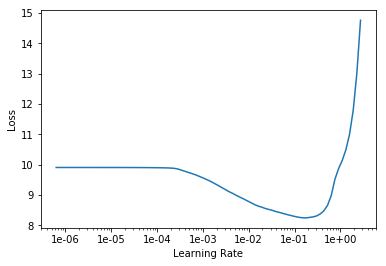

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.424613,2.285450,0.635612


In [85]:
learn.save('first', with_opt=True)

In [17]:
learn.load('first', with_opt=True);

In [87]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.140426,2.320289,0.626525
2,2.105650,2.333116,0.622337
3,2.012981,1.998724,0.665326
4,1.367031,1.651536,0.721605
5,1.632515,1.547202,0.740098


In [96]:
learn.save('second_sa_lm', with_opt=True)

In [18]:
learn.load('second_sa_lm', with_opt=True);

In [19]:
TEXT = "तस्याः पिता"
N_WORDS = 40
N_SENTENCES = 2

In [20]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

तस्याः पिता ▁श्री क देव गुरु : ▁माता ▁ब्रह्म वती ▁। ▁भगिनी ▁च ▁आसीत् ▁। ▁सा ▁परि जीव िका ▁। ▁अस्याः ▁जन्म ▁अपि ▁शारदा देवी ▁आसीत् ▁। ▁सा ▁ x x bo s ▁ स्क्रिप्ट ▁त्रुटि : ▁" ▁वर्षस्य भि hort गि
तस्याः पिता ▁सूर्य ा स्वामी , ▁माता ▁च ▁राज देवी ▁आसीत् ▁। ▁सा ▁तस्य ▁पत्नी ▁आसीत् ▁। ▁सा ▁च ▁वङ्ग देशस्य ▁नि वासिनः ▁। ▁ x x bo s ▁अयं ▁ भगवद्गीतायाः ▁अष्टम ोऽध्याय स्य ▁अक्षरब्रह्म योगस्य ▁दशम ः ▁श्लोकः ▁। ▁सः


In [93]:
np.exp(1.71)

5.528961477624004

In [21]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [6]:
# Generating embedding vectors for visualization

In [7]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-sanskrit/language-model')

In [8]:
defaults.device = torch.device('cpu')

In [9]:
learn = load_learner(path / 'SanskritDataset/')

In [10]:
encoder = get_model(learn.model)[0]

In [11]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([20000, 400])

In [12]:
embeddings = encoder.state_dict()['encoder.weight']

In [13]:
embeddings = np.array(embeddings)

In [14]:
embeddings[0].shape

(400,)

In [15]:
df = pd.DataFrame(embeddings)

In [16]:
df.shape

(20000, 400)

In [17]:
df.to_csv('embeddings.tsv', sep='\t', index=False, header=False)

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.845482,0.002750,0.229122,-0.157905,0.540435,0.187110,-0.314810,0.249854,0.670544,-0.246473,...,-0.208589,-0.179206,-0.628077,0.198964,0.131771,0.330633,-0.204282,-0.299742,0.427276,1.909813
1,0.606068,-0.188619,-0.018329,-0.168927,-0.125234,0.003209,0.443855,-0.138641,-0.084279,-0.720898,...,-0.323158,0.169242,-0.237647,-0.165308,0.019738,-0.232454,-0.260573,0.092453,0.183345,-0.081632
2,0.585107,-0.202102,-0.018583,-0.171217,-0.128058,0.007811,0.426960,-0.122143,-0.070361,-0.722861,...,-0.326218,0.134943,-0.256614,-0.128946,0.048279,-0.217350,-0.205649,0.087392,0.167779,-0.075951
3,0.210754,0.626120,-0.125331,-0.603106,0.460611,1.302732,-0.108113,-0.488499,-0.573385,0.221024,...,-0.473490,0.142905,0.405408,0.570074,0.543792,0.325439,-0.912725,-0.455087,-1.393294,0.500125
4,0.481134,-0.294333,-0.137888,-0.071492,0.082617,0.017993,0.480912,-0.037897,0.052968,0.443437,...,-0.304745,0.208941,0.301378,0.526713,0.442639,0.136838,0.930337,0.254463,-1.864046,-0.518552


In [19]:
df.shape

(20000, 400)

In [24]:
df2 = pd.DataFrame(itos)

In [25]:
df2.head()

,0
0,<unk>
1,<s>
2,</s>
3,▁।
4,▁


In [26]:
df2.shape

(20000, 1)

In [27]:
df2.to_csv('embeddings_metadata.tsv', sep='\t', index=False, header=False)

In [28]:
encoder.state_dict()['encoder.weight'][1]

tensor([ 6.0607e-01, -1.8862e-01, -1.8329e-02, -1.6893e-01, -1.2523e-01,
         3.2086e-03,  4.4386e-01, -1.3864e-01, -8.4279e-02, -7.2090e-01,
         1.5366e-01, -4.1441e-01,  1.3394e-01, -3.9729e-02, -2.2848e-01,
         1.1287e-01, -3.5505e-02, -5.1266e-02,  7.6375e-02, -2.6192e-01,
         1.3004e-01, -1.8738e-01, -5.6198e-01, -1.8404e-01,  1.5788e-01,
         2.3314e-01,  1.7355e-01, -4.1334e-02, -6.1374e-02, -1.3361e-01,
         3.4389e-01, -2.6367e-02,  5.7788e-02, -2.6255e-01, -3.3375e-01,
        -1.3880e-01, -5.9452e-02,  8.2178e-02,  1.6981e-01, -6.1177e-02,
        -4.5478e-03,  6.2996e-02, -8.6745e-01,  6.1866e-01, -7.1130e-02,
         3.7714e-02, -4.2437e-01,  2.6685e-02, -1.7103e-01, -4.6032e-01,
        -2.9001e-01,  3.6745e-01, -3.5332e-02, -1.3760e-01, -2.0094e-01,
         1.0211e-01, -1.1994e-01,  3.7443e-02,  2.3783e-01, -1.7630e-01,
        -2.8833e-01, -1.6289e-01, -1.3846e-01, -5.0487e-01, -1.4688e-01,
        -1.9997e-01,  9.8450e-02, -1.5580e+00, -2.4